In [34]:
import pandas as pd
import numpy as np

In [35]:
df1 = pd.DataFrame({'A':['A0','A1','A2','A3'],
 'B':['B0','B1','B2','B3'],
 'C':['C0','C1','C2','C3'],
 'D':['D0','D1','D2','D3']})
df2 = pd.DataFrame({'A':['A4','A5','A6','A7'],
 'B':['B4','B5','B6','B7'],
 'C':['C4','C5','C6','C7'],
 'D':['D4','D5','D6','D7']})

In [36]:
pd.concat([df1,df2])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


In [37]:
# para cambiar los indices
pd.concat([df1,df2],ignore_index=True)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [38]:
# normalmente se concatenan los DF en vertical, pero si lo requieres se hace así:
pd.concat([df1,df2],axis=1)

,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,A4,B4,C4,D4
1,A1,B1,C1,D1,A5,B5,C5,D5
2,A2,B2,C2,D2,A6,B6,C6,D6
3,A3,B3,C3,D3,A7,B7,C7,D7


## Merge

In [39]:
izq = pd.DataFrame({'key':['k0','k1','k2','k3'],
 'A':['A0','A1','A2','A3'],
 'B':['B0','B1','B2','B3']})

der = pd.DataFrame({'key':['k0','k1','k2','k3'],
 'C':['C0','C1','C2','C3'],
 'D':['D0','D1','D2','D3']})

In [40]:
izq

,key,A,B
0,k0,A0,B0
1,k1,A1,B1
2,k2,A2,B2
3,k3,A3,B3


In [41]:
izq.merge(der)

,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k1,A1,B1,C1,D1
2,k2,A2,B2,C2,D2
3,k3,A3,B3,C3,D3


In [42]:
der.merge(izq)

,key,C,D,A,B
0,k0,C0,D0,A0,B0
1,k1,C1,D1,A1,B1
2,k2,C2,D2,A2,B2
3,k3,C3,D3,A3,B3


## Merge 2


In [43]:
izq = pd.DataFrame({'key':['k0','k1','k2','k3'],
 'A':['A0','A1','A2','A3'],
 'B':['B0','B1','B2','B3']})

der = pd.DataFrame({'key2':['k0','k1','k2','k3'],
 'C':['C0','C1','C2','C3'],
 'D':['D0','D1','D2','D3']})

In [44]:
izq.merge(der, left_on = 'key', right_on = 'key2')

,key,A,B,key2,C,D
0,k0,A0,B0,k0,C0,D0
1,k1,A1,B1,k1,C1,D1
2,k2,A2,B2,k2,C2,D2
3,k3,A3,B3,k3,C3,D3


## Merge 3

In [45]:
izq = pd.DataFrame({'key' : ['k0', 'k1', 'k2','k3'],
 'A' : ['A0', 'A1', 'A2','A3'],
'B': ['B0', 'B1', 'B2','B3']})

der = pd.DataFrame({'key_2' : ['k0', 'k1', 'k2',np.nan],
 'C' : ['C0', 'C1', 'C2','C3'],
'D': ['D0', 'D1', 'D2','D3']})


In [46]:
der

,key_2,C,D
0,k0,C0,D0
1,k1,C1,D1
2,k2,C2,D2
3,NaN,C3,D3


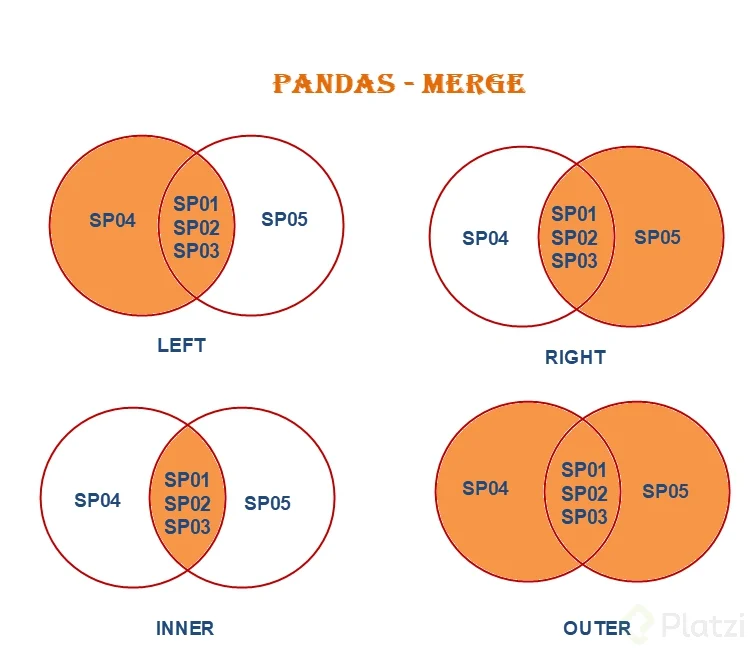

In [49]:
izq.merge(der, left_on = 'key', right_on = 'key_2', how='inner')

,key,A,B,key_2,C,D
0,k0,A0,B0,k0,C0,D0
1,k1,A1,B1,k1,C1,D1
2,k2,A2,B2,k2,C2,D2


In [48]:
izq.merge(der, left_on = 'key', right_on='key_2', how='left')

,key,A,B,key_2,C,D
0,k0,A0,B0,k0,C0,D0
1,k1,A1,B1,k1,C1,D1
2,k2,A2,B2,k2,C2,D2
3,k3,A3,B3,NaN,NaN,NaN


In [50]:
izq.merge(der, left_on = 'key', right_on='key_2', how='right')

,key,A,B,key_2,C,D
0,k0,A0,B0,k0,C0,D0
1,k1,A1,B1,k1,C1,D1
2,k2,A2,B2,k2,C2,D2
3,NaN,NaN,NaN,NaN,C3,D3


## **Join**- index match

In [53]:
izq = pd.DataFrame({'A':['A0','A1','A2'],
 'B':['B0','B1','B2']},
index=['k0','k1','k2'])

der = pd.DataFrame({'C':['C0','C1','C2'],
 'D':['D0','D1','D2']},
index=['k0','k2','k3'])

In [54]:
izq.join(der)

,A,B,C,D
k0,A0,B0,C0,D0
k1,A1,B1,NaN,NaN
k2,A2,B2,C1,D1


In [55]:
izq.join(der, how='inner')

,A,B,C,D
k0,A0,B0,C0,D0
k2,A2,B2,C1,D1


In [56]:
izq.join(der, how='left')

,A,B,C,D
k0,A0,B0,C0,D0
k1,A1,B1,NaN,NaN
k2,A2,B2,C1,D1


In [57]:
izq.join(der, how='right')

,A,B,C,D
k0,A0,B0,C0,D0
k2,A2,B2,C1,D1
k3,NaN,NaN,C2,D2


In [58]:
izq.join(der, how='outer')

,A,B,C,D
k0,A0,B0,C0,D0
k1,A1,B1,NaN,NaN
k2,A2,B2,C1,D1
k3,NaN,NaN,C2,D2
